## Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

## Reading data from disk

In [2]:
df = pd.read_excel('Book1..xlsx')

## Checking DataFrame

In [3]:
df.head(20)

,stations,Date & Period of Survey,PM10,PM2.5,SO2,NO2,AQI
0,Anna Nagar,2019-02-01 00:00:00,106,40.0,11,18,68
1,Anna Nagar,2019-05-07 00:00:00,119,31.0,14,26,63
2,Nungambakkam,2019-04-07 00:00:00,126,35.0,13,29,70
3,Anna Nagar,2019-07-01 00:00:00,94,31.0,13,20,63
4,Nungambakkam,2019-08-01 00:00:00,72,39.0,14,22,63
5,t.nagar,2019-10-01 00:00:00,153,40.0,12,21,62
6,Nungampakkam,2019-11-01 00:00:00,86,38.0,16,24,50
7,adyar,18/1/2019,36,NaN,8,18,84
8,Kilpauk,19/1/2019,99,38.0,12,20,209
9,Anna Nagar,21/1/2019,156,51.0,12,19,177


## Exploratory Data Analaysis

#### Pandas dataframe.info() function is used to get a concise summary of the dataframe.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
stations                   366 non-null object
Date & Period of Survey    365 non-null object
PM10                       366 non-null int64
PM2.5                      312 non-null float64
SO2                        366 non-null int64
NO2                        366 non-null int64
AQI                        366 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 20.1+ KB


#### Pandas describe() is used to view some basic statistical details like percentile, mean, std etc of a data frame or a series of numeric values .

In [5]:
df.describe()

,PM10,PM2.5,SO2,NO2,AQI
count,366.000000,312.000000,366.000000,366.000000,366.000000
mean,114.035519,41.871795,10.568306,20.295082,91.459016
std,34.729978,10.247558,1.983350,2.675168,31.363048
min,11.000000,12.000000,7.000000,1.000000,23.000000
25%,94.000000,35.000000,10.000000,19.000000,68.000000
50%,115.500000,44.500000,11.000000,21.000000,93.000000
75%,135.000000,50.000000,12.000000,22.000000,109.000000
max,231.000000,59.000000,30.000000,29.000000,242.000000


#### DataFrame stores the number of rows and columns as a tuple (number of rows, number of columns) .

In [6]:
df.shape

(366, 7)

## Preprocessing the data

#### Filling NaN using Mean

In [7]:
df = df.fillna(df.mean())  

#### Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form.

In [8]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()
df['le_stations'] = lbl.fit_transform(df['stations'])
df.tail()

,stations,Date & Period of Survey,PM10,PM2.5,SO2,NO2,AQI,le_stations
361,t.nagar,13/11/2019,149,41.871795,11,17,67,7
362,Nungambakkam,13/11/2019,143,46.000000,12,21,109,2
363,t.nagar,14/11/2019,117,55.000000,11,21,93,7
364,Nungambakkam,14/11/2019,176,43.000000,12,21,62,2
365,adyar,15/11/2019,117,41.871795,11,16,115,4


#### Droping down Non usage columns 

In [9]:
df= df.drop(['stations','Date & Period of Survey'], axis=1)

In [10]:
df.head()

,PM10,PM2.5,SO2,NO2,AQI,le_stations
0,106,40.0,11,18,68,0
1,119,31.0,14,26,63,0
2,126,35.0,13,29,70,2
3,94,31.0,13,20,63,0
4,72,39.0,14,22,63,2


#### Co relation gives you the measure of the strength of association between two variables.
#### Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation

In [11]:
df.corr()

,PM10,PM2.5,SO2,NO2,AQI,le_stations
PM10,1.000000,0.234791,0.046521,0.012626,-0.088578,0.061144
PM2.5,0.234791,1.000000,0.025253,0.069181,0.009061,0.081860
SO2,0.046521,0.025253,1.000000,0.107209,0.015659,-0.122707
NO2,0.012626,0.069181,0.107209,1.000000,-0.014158,-0.044064
AQI,-0.088578,0.009061,0.015659,-0.014158,1.000000,-0.140083
le_stations,0.061144,0.081860,-0.122707,-0.044064,-0.140083,1.000000


#### A histogram is a representation of the distribution of data. This function groups the values of all given Series in the DataFrame into bins and draws all bins in one matplotlib. axes

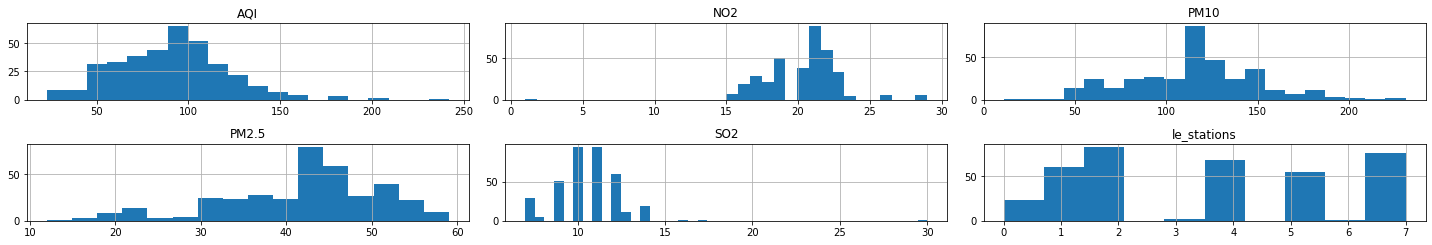

In [12]:
df.hist(figsize = (20, 10), layout=(6, 3), bins = 'auto')
plt.tight_layout()
plt.show()

## Machine Learning Algorthim

### 1.Linear regression - Importing required library

In [13]:
from sklearn.linear_model import LinearRegression

#### For linear regression creating x,y instance

In [14]:
X = df.drop(['AQI'], axis = 1 ) 
y = df.AQI

#### Applying Linear regression , then converting the fit data to dataframe . Traing the data and getting the score

In [15]:
regressor = LinearRegression()  
train_LR = regressor.fit(X,y)
lr_score=train_LR.score(X,y)
print(lr_score)
aqi_Lr= pd.DataFrame(regressor.coef_, X.columns, columns=['aqi_lr'])  
aqi_Lr

0.02816865713902528


,aqi_lr
PM10,-0.081378
PM2.5,0.142629
SO2,0.066068
NO2,-0.264374
le_stations,-1.897334


### 2.K Nearest Neighbor

#### Importing K nearest lib

In [16]:
from sklearn.neighbors import KNeighborsRegressor

#### Applying K Nearest Neighbor, setting the nearest range. Traing the data and getting the score

In [17]:
scores= []
k = []
for i in range(2,30):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X,y)
    k_re=knn.score(X,y)
    scores.append(k_re)
    k.append(i)
    #print(k_re)
knn_max_scor = np.max(scores)
print(knn_max_scor)

0.5524559259627588


#### Accuracy for different K Values

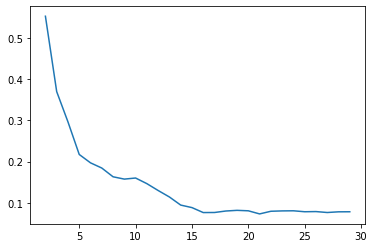

In [18]:
plt.plot(k,scores)

### 3.Decision Tree

#### Importing decision tree lib

In [19]:
from sklearn.tree import DecisionTreeRegressor

#### Applying Decision Tree algorthim. Traing the data and getting the score

In [20]:
dtr = DecisionTreeRegressor()
dtr.fit(X,y)
dt_score = dtr.score(X,y)
print(dt_score)

0.9987410483708283


### 4.Random Forest

#### Applying Random Forest. Traing the data and getting the score

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
rfr= RandomForestRegressor(n_estimators=10)
rfr.fit(X,y)
rf_score = rfr.score(X,y)
print(rf_score)

0.7954893565651582


### Ploting the scores for vizualization

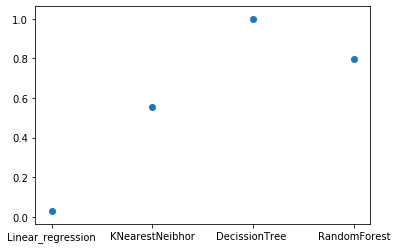

In [27]:
import matplotlib.pyplot as plt
y = [ lr_score , knn_max_scor, dt_score, rf_score]
x = ['Linear_regression' ,'KNearestNeibhor' , 'DecissionTree ', 'RandomForest']
     
plt.scatter(x,y)

# CONCLUSION : 
## From above graph we can see that 'Decision Tree Algorthim ' is giving more accurecy for our dataset. (i.e) Score= 0.998